### Prepr ML Assessment Challenge

Loading/cleaning labour force data

In [1]:
import pandas as pd

In [67]:
# load data from customized statscan table
labourforce_df = pd.read_csv('labourforce_data.csv')

In [68]:
# check how the data loaded
labourforce_df.head(3)

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015-01,Newfoundland and Labrador,2016A000210,Population,Males,15 to 24 years,Estimate,Unadjusted,Persons,249,thousands,3,v2065113,2.1.2.2.1.2,29.2,NaN,NaN,NaN,1
1,2015-02,Newfoundland and Labrador,2016A000210,Population,Males,15 to 24 years,Estimate,Unadjusted,Persons,249,thousands,3,v2065113,2.1.2.2.1.2,29.1,NaN,NaN,NaN,1
2,2015-03,Newfoundland and Labrador,2016A000210,Population,Males,15 to 24 years,Estimate,Unadjusted,Persons,249,thousands,3,v2065113,2.1.2.2.1.2,29.0,NaN,NaN,NaN,1


In [69]:
# drop unnecessary columns
labourforce_df = labourforce_df.drop(columns=['DGUID','Statistics','Data type','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'])

### Visualizing Labour Force Data

Plotting Labour Force characteristic rates by sex (Males/Females) and age demographics (15-24,25-54,55+)

In [44]:
import plotly.express as px

In [70]:
labourforce_df = labourforce_df[labourforce_df['Labour force characteristics'].isin(['Participation rate','Employment rate','Unemployment rate'])]

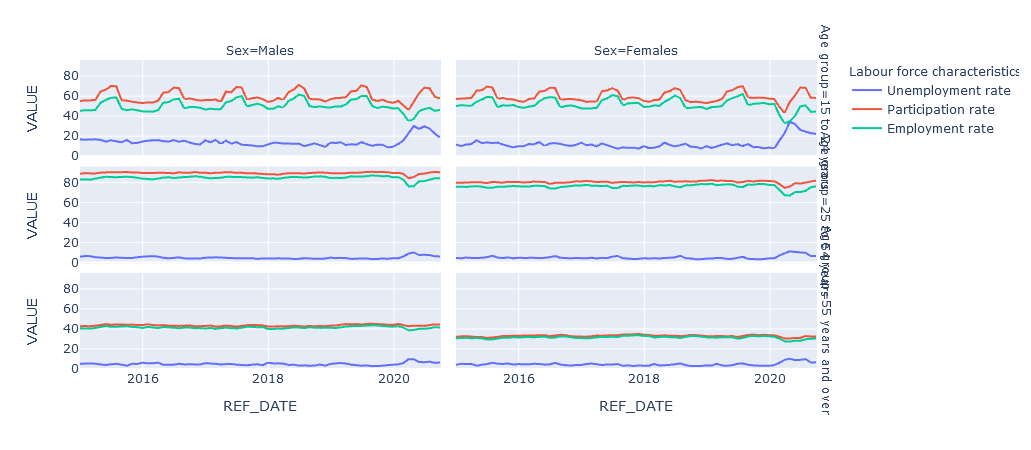

In [72]:
province = 'Ontario'
fig = px.line(labourforce_df[labourforce_df['GEO']==province], x="REF_DATE", y="VALUE", color='Labour force characteristics',
              line_group='Age group',hover_name='GEO', facet_row='Age group',facet_col='Sex')
fig.show()

Loading Job Sectors Data

In [111]:
employmentsectors_df = pd.read_csv('industry_data.csv')

In [112]:
employmentsectors_df.head(3)

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015-01,Newfoundland and Labrador,2016A000210,"Agriculture [111-112, 1100, 1151-1152]",Estimate,Unadjusted,Persons,249,thousands,3,v2057833,2.3.1.2,1.5,NaN,NaN,NaN,1
1,2015-02,Newfoundland and Labrador,2016A000210,"Agriculture [111-112, 1100, 1151-1152]",Estimate,Unadjusted,Persons,249,thousands,3,v2057833,2.3.1.2,0.8,NaN,NaN,NaN,1
2,2015-03,Newfoundland and Labrador,2016A000210,"Agriculture [111-112, 1100, 1151-1152]",Estimate,Unadjusted,Persons,249,thousands,3,v2057833,2.3.1.2,1.4,NaN,NaN,NaN,1
3,2015-04,Newfoundland and Labrador,2016A000210,"Agriculture [111-112, 1100, 1151-1152]",Estimate,Unadjusted,Persons,249,thousands,3,v2057833,2.3.1.2,1.4,NaN,NaN,NaN,1
4,2015-05,Newfoundland and Labrador,2016A000210,"Agriculture [111-112, 1100, 1151-1152]",Estimate,Unadjusted,Persons,249,thousands,3,v2057833,2.3.1.2,1.8,NaN,NaN,NaN,1


In [113]:
# drop unnecessary columns
employmentsectors_df = employmentsectors_df.drop(columns=['DGUID','Statistics','Data type','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'])

In [114]:
# check how many unique categories
employmentsectors_df['North American Industry Classification System (NAICS)'].unique()

array(['Agriculture [111-112, 1100, 1151-1152]',
       'Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]',
       'Utilities [22]', 'Construction [23]', 'Manufacturing [31-33]',
       'Wholesale and retail trade [41, 44-45]',
       'Transportation and warehousing [48-49]',
       'Finance, insurance, real estate, rental and leasing [52-53]',
       'Professional, scientific and technical services [54]',
       'Business, building and other support services [55-56]',
       'Educational services [61]',
       'Health care and social assistance [62]',
       'Information, culture and recreation [51, 71]',
       'Accommodation and food services [72]',
       'Other services (except public administration) [81]',
       'Public administration [91]'], dtype=object)

In [115]:
current_sectors = employmentsectors_df[employmentsectors_df['REF_DATE']=='2020-10'].copy()

In [116]:
# create JOB GROWTH feature
current_sectors['JOB GROWTH'] = ((current_sectors.VALUE.values - employmentsectors_df[employmentsectors_df['REF_DATE']=='2015-01'].VALUE.values) / employmentsectors_df[employmentsectors_df['REF_DATE']=='2015-01'].VALUE.values) * 100

### Visualizing Job Sectors

Using Sunburst style chart to map provinces to largest employment sectors, with heat map to show which sectors have experienced highest job growth over the past 5 years

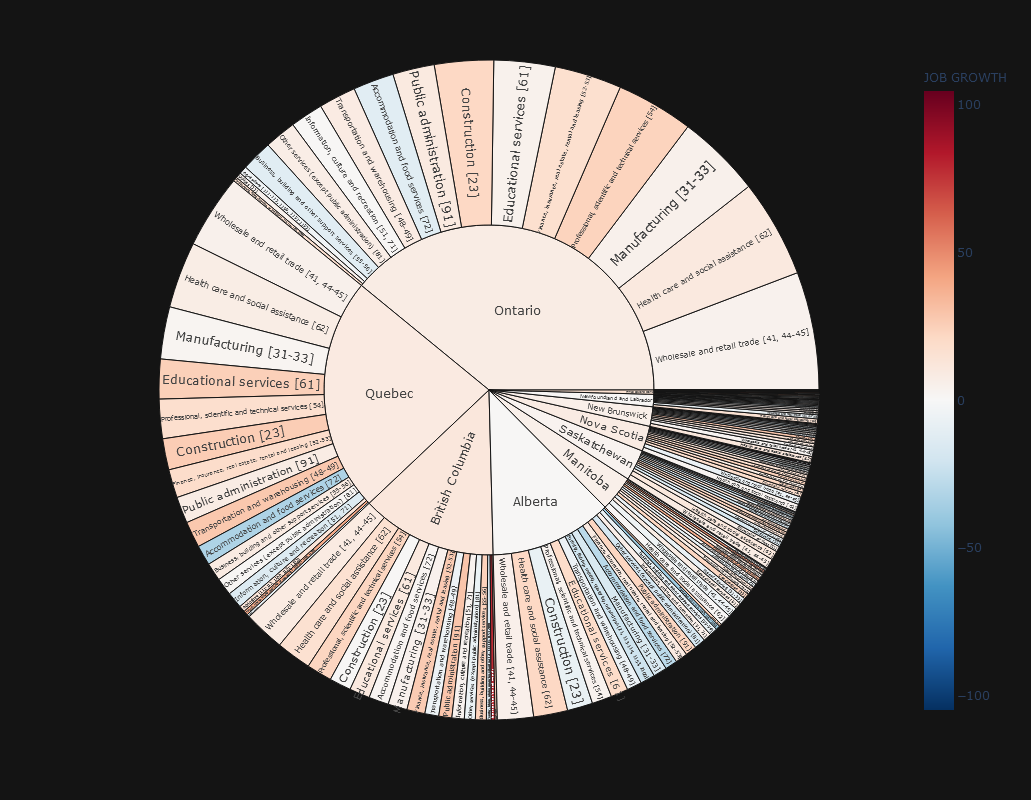

In [189]:
import numpy as np
fig = px.sunburst(current_sectors, path=['GEO', 'North American Industry Classification System (NAICS)'], values='VALUE',
                  color='JOB GROWTH', hover_data=['North American Industry Classification System (NAICS)'],
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=0,
                  width = 1000, height = 800)
fig.update_layout({

'paper_bgcolor': 'rgba(20, 20, 20, 20)',
})
fig.show()

Loading job skills data set

In [133]:
jobskills_df = pd.read_csv('job_skills.csv')

In [134]:
jobskills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [136]:
# check how many unique categories
jobskills_df['Category'].unique()

array(['Program Management', 'Manufacturing & Supply Chain',
       'Technical Solutions', 'Developer Relations',
       'Hardware Engineering', 'Partnerships',
       'Product & Customer Support', 'Software Engineering',
       'Data Center & Network', 'Business Strategy', 'Technical Writing',
       'Technical Infrastructure', 'IT & Data Management',
       'Marketing & Communications', 'Network Engineering',
       'Sales & Account Management', 'Sales Operations', 'Finance',
       'Legal & Government Relations', 'Administrative',
       'User Experience & Design', 'People Operations',
       'Real Estate & Workplace Services'], dtype=object)

In [178]:
# check for missing values
jobskills_df[jobskills_df['Category']=='Technical Solutions'].isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum Qualifications       True
Preferred Qualifications     True
dtype: bool

In [179]:
# fill missing values
jobskills_df.fillna('',inplace=True)

In [180]:
job_category = 'Technical Solutions'
text = ' '.join(jobskills_df[jobskills_df['Category']==job_category]['Preferred Qualifications'].tolist() + 
               jobskills_df[jobskills_df['Category']==job_category]['Minimum Qualifications'].tolist())

### Visualizing Job Skills

Using a word cloud to create a corpus of words from the requested qualifications for a given job category

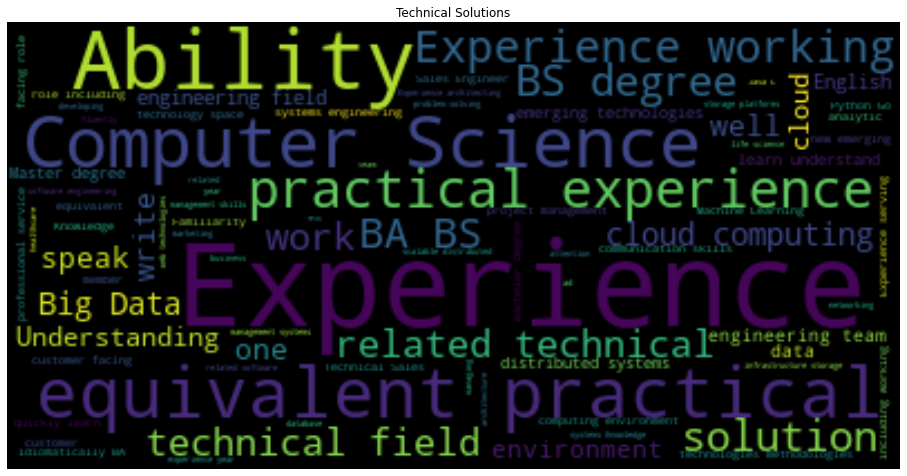

In [186]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(16, 16))
plt.title(job_category)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(f'{job_category}-wordcloud.png')
